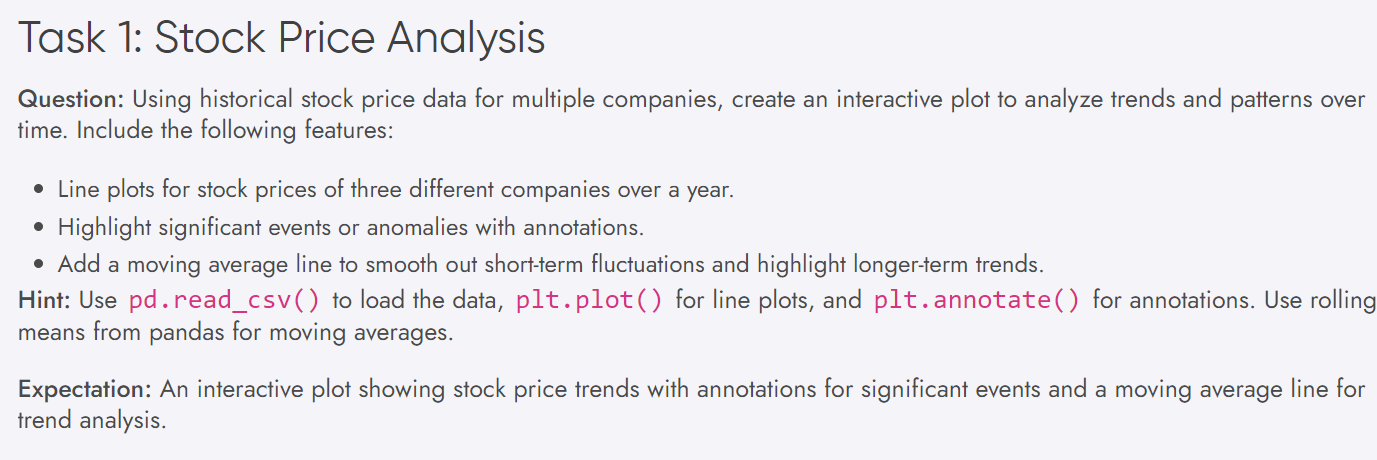

In [4]:
# Install and import the required libraries and modules
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Download historical stock data for Apple, Microsoft, and Alphabet
tickers = ['AAPL', 'MSFT', 'GOOGL']
start_date = '2023-01-01'
end_date = '2023-12-31'

data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Save the data to CSV
data.to_csv('historical_stock_prices.csv')

# Read the data
df = pd.read_csv('historical_stock_prices.csv', parse_dates=['Date'])

[*********************100%%**********************]  3 of 3 completed


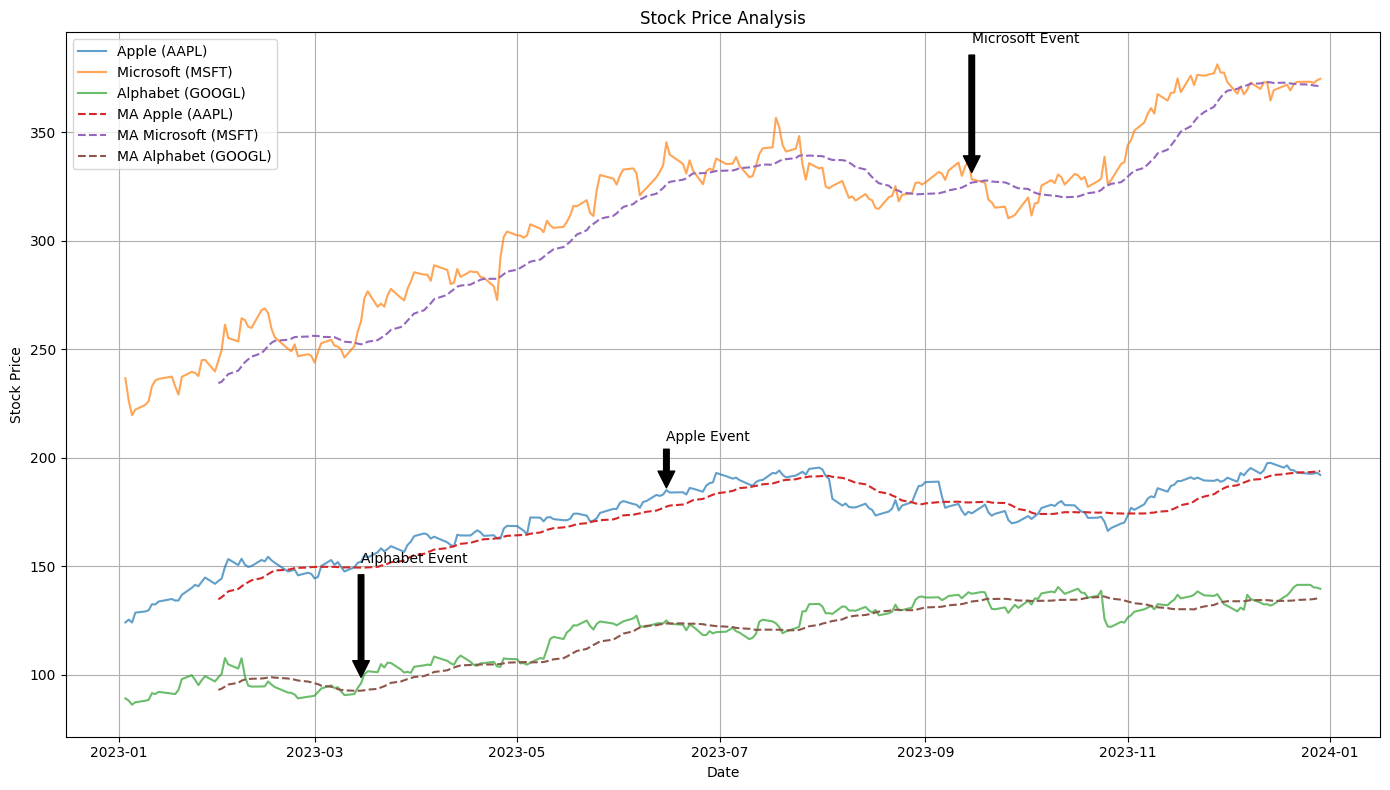

In [6]:
# Calculate the moving averages
df['MA_AAPL'] = df['AAPL'].rolling(window=20).mean()
df['MA_MSFT'] = df['MSFT'].rolling(window=20).mean()
df['MA_GOOGL'] = df['GOOGL'].rolling(window=20).mean()

# Plotting
plt.figure(figsize=(14, 8))

# Plot stock prices
plt.plot(df['Date'], df['AAPL'], label='Apple (AAPL)', alpha=0.7)
plt.plot(df['Date'], df['MSFT'], label='Microsoft (MSFT)', alpha=0.7)
plt.plot(df['Date'], df['GOOGL'], label='Alphabet (GOOGL)', alpha=0.7)

# Plot moving averages
plt.plot(df['Date'], df['MA_AAPL'], label='MA Apple (AAPL)', linestyle='--')
plt.plot(df['Date'], df['MA_MSFT'], label='MA Microsoft (MSFT)', linestyle='--')
plt.plot(df['Date'], df['MA_GOOGL'], label='MA Alphabet (GOOGL)', linestyle='--')

# Highlight specific dates
# Convert the specific dates to datetime objects
event_dates = pd.to_datetime(['2023-06-15', '2023-09-15', '2023-03-15'])

# Add annotations
plt.annotate('Apple Event', xy=(event_dates[0], df.loc[df['Date'] == event_dates[0], 'AAPL'].values[0]),
             xytext=(event_dates[0], df['AAPL'].max() + 10),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Microsoft Event', xy=(event_dates[1], df.loc[df['Date'] == event_dates[1], 'MSFT'].values[0]),
             xytext=(event_dates[1], df['MSFT'].max() + 10),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Alphabet Event', xy=(event_dates[2], df.loc[df['Date'] == event_dates[2], 'GOOGL'].values[0]),
             xytext=(event_dates[2], df['GOOGL'].max() + 10),
             arrowprops=dict(facecolor='black', shrink=0.05))

# Labels and legend
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Analysis')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()
